In [21]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import stats
from datetime import datetime
dateparse = lambda x: datetime.strptime(x, '%m/%d/%Y %H:%M')
import plotly.express as px
import plotly.graph_objects as go
from mpl_toolkits import mplot3d
from sklearn import preprocessing, svm 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 

In [22]:
df6 = pd.read_csv('./inv6_emi_data_t345678.csv',
                encoding="utf-8-sig",
                header=0,
                infer_datetime_format=True,
                parse_dates={'datetime':[5]},
                index_col=['datetime']
                )

In [23]:
df6['time'] = df6.index
df6['year'] = df6.index.year
df6['month'] = df6.index.month
df6['day'] = df6.index.day
df6['hour'] = df6.index.hour
df6['dayofweek'] = df6.index.dayofweek
df6['dayname'] = df6.index.day_name()
df6['hourofweek'] = df6.hour+24*df6.dayofweek
df6['hourofmonth'] =df6.hour+24*(df6.day-1)
df6['Tcell']=df6['Ambient temperature(℃)']+df6['Irradiance(W/㎡)']/800*(25-20)
df6['Pm']=2.172*1.303*220*2*590*df6['Irradiance(W/㎡)']/1000*(1-0.0045*(df6['Tcell']-25))*20.5/100
df6['Hieu suat']=df6['Total input power(kW)']*1000/df6['Pm']*100
df6.head(10)

,Unnamed: 0.1,Unnamed: 0,Site Name,Management Domain,ManageObject_x,Ambient temperature(℃),PV Temperature(℃),Wind speed(m/s),Wind direction(°),Daily irradiation(MJ/㎡),...,month,day,hour,dayofweek,dayname,hourofweek,hourofmonth,Tcell,Pm,Hieu suat
datetime,,,,,,,,,,,,,,,,,,,,,
2022-03-03 14:10:00,0,0,VNM - Đà Nẵng - Nhà Máy,/BCG Energy,1020C0058922/EM001020C0058922,25.1,32.1,4.6,NaN,0.043,...,3,3,14,3,Thursday,86,62,26.853750,41909.494937,17.392240
2022-03-03 14:15:00,1,1,VNM - Đà Nẵng - Nhà Máy,/BCG Energy,1020C0058922/EM001020C0058922,25.0,31.1,1.8,NaN,0.124,...,3,3,14,3,Thursday,86,62,26.693750,40505.058080,50.801063
2022-03-03 14:20:00,2,2,VNM - Đà Nẵng - Nhà Máy,/BCG Energy,1020C0058922/EM001020C0058922,24.7,31.0,3.1,NaN,0.208,...,3,3,14,3,Thursday,86,62,26.433125,41495.671114,48.959324
2022-03-03 14:25:00,3,3,VNM - Đà Nẵng - Nhà Máy,/BCG Energy,1020C0058922/EM001020C0058922,24.6,29.6,1.0,NaN,0.275,...,3,3,14,3,Thursday,86,62,25.823750,29380.731662,51.530371
2022-03-03 14:30:00,4,4,VNM - Đà Nẵng - Nhà Máy,/BCG Energy,1020C0058922/EM001020C0058922,24.7,29.2,1.4,NaN,0.332,...,3,3,14,3,Thursday,86,62,25.830000,27129.143654,0.000000
2022-03-03 14:35:00,5,5,VNM - Đà Nẵng - Nhà Máy,/BCG Energy,1020C0058922/EM001020C0058922,24.7,29.5,2.5,NaN,0.390,...,3,3,14,3,Thursday,86,62,25.948750,29964.023868,51.017847
2022-03-03 14:40:00,6,6,VNM - Đà Nẵng - Nhà Máy,/BCG Energy,1020C0058922/EM001020C0058922,24.4,29.1,2.7,NaN,0.451,...,3,3,14,3,Thursday,86,62,25.707500,31407.948867,51.133552
2022-03-03 14:45:00,7,7,VNM - Đà Nẵng - Nhà Máy,/BCG Energy,1020C0058922/EM001020C0058922,24.5,29.3,2.8,NaN,0.516,...,3,3,14,3,Thursday,86,62,25.793750,31065.554409,50.190638
2022-03-03 14:50:00,8,8,VNM - Đà Nẵng - Nhà Máy,/BCG Energy,1020C0058922/EM001020C0058922,24.4,28.4,1.4,NaN,0.569,...,3,3,14,3,Thursday,86,62,25.329375,22362.974623,48.692091


In [24]:
df6_1=df6.groupby(['hour','day','month','year'])['Total input power(kW)','Ambient temperature(℃)','Irradiance(W/㎡)'].mean()
df6_1=df6_1[df6_1['Ambient temperature(℃)']>6]
df6_1=df6_1.reset_index()
df6_1=df6_1[df6_1.groupby(['day','month','year'])['Irradiance(W/㎡)'].transform(max)==df6_1['Irradiance(W/㎡)']]
df6_1=df6_1.reset_index()
df6_1['date']=pd.to_datetime(df6_1[['year','month','day','hour']])
df6_1= df6_1.sort_values('date')
df6_1['Tcell']=df6_1['Ambient temperature(℃)']+df6_1['Irradiance(W/㎡)']/800*(25-20)
df6_1['Pm']=2.172*1.303*220*2*590*df6_1['Irradiance(W/㎡)']/1000*(1+0.0045*(df6_1['Tcell']-25))*20.5/100
df6_1['Hieu suat']=df6_1['Total input power(kW)']*1000/df6_1['Pm']*100
print(df6_1)

     index  hour  day  month  year  Total input power(kW)  \
156   1617    14    3      3  2022              12.974500   
34    1160    11    4      3  2022              50.432455   
127   1388    12   19      3  2022              33.816000   
19    1089    10   21      3  2022              15.577500   
76    1250    11   22      3  2022              58.836583   
..     ...   ...  ...    ...   ...                    ...   
20    1094    10   21      8  2022              56.899167   
134   1409    12   22      8  2022              57.697083   
82    1261    11   23      8  2022              58.639500   
85    1267    11   24      8  2022              54.172417   
4      962     9   25      8  2022              41.832250   

     Ambient temperature(℃)  Irradiance(W/㎡)                date      Tcell  \
156               24.630000       208.940000 2022-03-03 14:00:00  25.935875   
34                 6.545455       683.245455 2022-03-04 11:00:00  10.815739   
127                6.866667   

C:\Users\badao\AppData\Local\Temp\ipykernel_27256\2240751719.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [25]:
i=3
while i<=8:
    c=str(i)
    df6_1=df6.groupby(['hour','day','month','year'])['Total input power(kW)','Ambient temperature(℃)','Irradiance(W/㎡)'].mean()
    df6_1=df6_1[df6_1['Ambient temperature(℃)']>6]
    df6_1=df6_1.reset_index()
    df6_1=df6_1[df6_1.groupby(['day','month','year'])['Irradiance(W/㎡)'].transform(max)==df6_1['Irradiance(W/㎡)']]
    df6_1=df6_1.reset_index()
    df6_1['date']=pd.to_datetime(df6_1[['year','month','day','hour']])
    df6_1= df6_1.sort_values('date')
    df6_1=df6_1[df6_1['month']==i]
    df6_1['Tcell']=df6_1['Ambient temperature(℃)']+df6_1['Irradiance(W/㎡)']/800*(25-20)
    df6_1['Pm']=2.172*1.303*220*2*590*df6_1['Irradiance(W/㎡)']/1000*(1+0.0045*(df6_1['Tcell']-25))*20.5/100
    df6_1['Hieu suat']=df6_1['Total input power(kW)']*1000/df6_1['Pm']*100
    fig = go.Figure()
    fig.add_trace(go.Scatter(
        x=df6_1['date'],
        y=df6_1['Irradiance(W/㎡)'],
        name="Irra trung binh cao nhat moi ngay inverter 6 thang "+c))
    fig.update_traces (
    showlegend = True 
    )
    fig.update_xaxes(
        rangeslider_visible=True,
    )
    fig.show()
    i=i+1


C:\Users\badao\AppData\Local\Temp\ipykernel_27256\2305048916.py:4: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



C:\Users\badao\AppData\Local\Temp\ipykernel_27256\2305048916.py:4: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



C:\Users\badao\AppData\Local\Temp\ipykernel_27256\2305048916.py:4: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



C:\Users\badao\AppData\Local\Temp\ipykernel_27256\2305048916.py:4: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



C:\Users\badao\AppData\Local\Temp\ipykernel_27256\2305048916.py:4: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



C:\Users\badao\AppData\Local\Temp\ipykernel_27256\2305048916.py:4: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [26]:
i=3
while i<=8:
    c=str(i)
    df6_1=df6.groupby(['hour','day','month','year'])['Total input power(kW)','Ambient temperature(℃)','Irradiance(W/㎡)'].mean()
    df6_1=df6_1[df6_1['Ambient temperature(℃)']>6]
    df6_1=df6_1.reset_index()
    df6_1=df6_1[df6_1.groupby(['day','month','year'])['Irradiance(W/㎡)'].transform(max)==df6_1['Irradiance(W/㎡)']]
    df6_1=df6_1.reset_index()
    df6_1['date']=pd.to_datetime(df6_1[['year','month','day','hour']])
    df6_1= df6_1.sort_values('date')
    df6_1=df6_1[df6_1['month']==i]
    df6_1['Tcell']=df6_1['Ambient temperature(℃)']+df6_1['Irradiance(W/㎡)']/800*(25-20)
    df6_1['Pm']=2.172*1.303*220*2*590*df6_1['Irradiance(W/㎡)']/1000*(1+0.0045*(df6_1['Tcell']-25))*20.5/100
    df6_1['Hieu suat']=df6_1['Total input power(kW)']*1000/df6_1['Pm']*100
    fig.add_trace(go.Scatter(
        x=df6_1['date'],
        y=df6_1['Total input power(kW)'],
        name="San luong dien cua Irra TBCN moi ngay inverter 6 thang "+c))
    fig.add_trace(go.Scatter(
        x=df6_1['date'],
        y=df6_1['Ambient temperature(℃)'],
        name="Nhiet do cua Irra TBCN moi ngay inverter 6 thang "+c))
    fig.add_trace(go.Scatter(
        x=df6_1['date'],
        y=df6_1['Hieu suat'],
        name="Hieu suat cua Irra TBCN moi ngay inverter 6 thang "+c))
    fig.update_traces (
    showlegend = True 
    )
    fig.update_xaxes(
        rangeslider_visible=True,
    )
    fig.show()
    i=i+1

C:\Users\badao\AppData\Local\Temp\ipykernel_27256\3672334948.py:4: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



C:\Users\badao\AppData\Local\Temp\ipykernel_27256\3672334948.py:4: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



C:\Users\badao\AppData\Local\Temp\ipykernel_27256\3672334948.py:4: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



C:\Users\badao\AppData\Local\Temp\ipykernel_27256\3672334948.py:4: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



C:\Users\badao\AppData\Local\Temp\ipykernel_27256\3672334948.py:4: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



C:\Users\badao\AppData\Local\Temp\ipykernel_27256\3672334948.py:4: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [54]:
df6_2=df6[['hour','day','month','year','Total input power(kW)','Ambient temperature(℃)','Irradiance(W/㎡)']]
df6_2=df6_2[df6_2['Ambient temperature(℃)']>6]
df6_2['date']=pd.to_datetime(df6_2[['year','month','day','hour']])
df6_2['Tcell']=df6_2['Ambient temperature(℃)']+df6_2['Irradiance(W/㎡)']/800*(25-20)
df6_2['Pm']=2.172*1.303*220*2*590*df6_2['Irradiance(W/㎡)']/1000*(1+0.0045*(df6_2['Tcell']-25))*20.5/100
df6_2['Hieu suat']=df6_2['Total input power(kW)']*1000/df6_2['Pm']*100
df6_2=df6_2.reset_index()
df6_2['stt']=df6_2.index
df_binary = df6_2[['stt', 'Hieu suat']]
df_binary = df_binary[df_binary['Hieu suat']<100]
df_binary = df_binary[df_binary['Hieu suat']>40]
df_binary.describe 


<bound method NDFrame.describe of          stt  Hieu suat
1          1  50.032522
2          2  48.331887
3          3  51.149749
5          5  50.584071
6          6  50.808993
...      ...        ...
50587  50587  43.801090
50588  50588  43.637346
50589  50589  44.485383
50590  50590  43.955456
50591  50591  43.376324

[35980 rows x 2 columns]>

0.011316720623170018


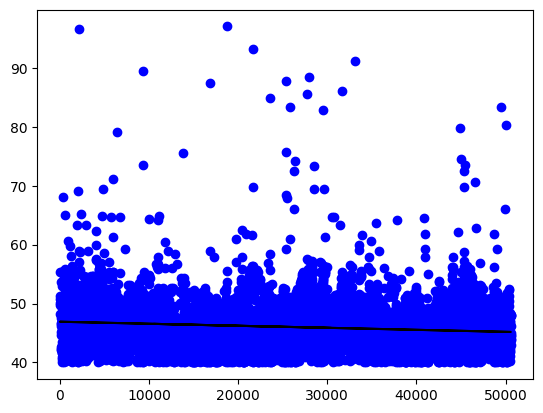

In [55]:
df_binary.fillna(method ='ffill', inplace = True) 
X = np.array(df_binary['stt']).reshape(-1, 1) 
y = np.array(df_binary['Hieu suat']).reshape(-1, 1) 
  
# Separating the data into independent and dependent variables 
# Converting each dataframe into a numpy array  
# since each dataframe contains only one column 
df_binary.dropna(inplace = True) 
  
# Dropping any rows with Nan values 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25) 
  
# Splitting the data into training and testing data 
regr = LinearRegression() 
  
regr.fit(X_train, y_train) 
print(regr.score(X_test, y_test))
y_pred = regr.predict(X_test) 
plt.scatter(X_test, y_test, color ='b') 
plt.plot(X_test, y_pred, color ='k') 
  
plt.show() 